#  Question 1 

#  Support Vector Machine Salary data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

###   Analyzing the training dataset  

In [2]:
salary_train = pd.read_csv("SalaryData_Train(1).csv")
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [4]:
salary_train1 = salary_train[salary_train.duplicated()]
salary_train1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [5]:
salary_train2 = salary_train.drop_duplicates().reset_index(drop=True)
salary_train2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
26899,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
26900,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
26901,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [6]:
salary_train2.workclass = salary_train2.workclass.astype('category').cat.codes
salary_train2.education = salary_train2.education.astype('category').cat.codes
salary_train2.maritalstatus = salary_train2.maritalstatus.astype('category').cat.codes
salary_train2.occupation = salary_train2.occupation.astype('category').cat.codes
salary_train2.relationship = salary_train2.relationship.astype('category').cat.codes
salary_train2.race = salary_train2.race.astype('category').cat.codes
salary_train2.sex = salary_train2.sex.astype('category').cat.codes
salary_train2.native = salary_train2.native.astype('category').cat.codes
salary_train2.Salary = salary_train2.Salary.astype('category').cat.codes

In [7]:
salary_train2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,53,2,12,14,2,3,0,4,1,0,0,40,37,1
26899,22,2,15,10,4,10,1,4,1,0,0,40,37,0
26900,27,2,7,12,2,12,5,4,0,0,0,38,37,0
26901,58,2,11,9,6,0,4,4,0,0,0,40,37,0


In [8]:
salary_train3 = salary_train2.values

In [9]:
salary_train3

array([[39,  5,  9, ..., 40, 37,  0],
       [50,  4,  9, ..., 13, 37,  0],
       [38,  2, 11, ..., 40, 37,  0],
       ...,
       [27,  2,  7, ..., 38, 37,  0],
       [58,  2, 11, ..., 40, 37,  0],
       [52,  3, 11, ..., 40, 37,  1]], dtype=int64)

In [10]:
x_sal_train = salary_train3[:,0:13]
x_sal_train

array([[39,  5,  9, ...,  0, 40, 37],
       [50,  4,  9, ...,  0, 13, 37],
       [38,  2, 11, ...,  0, 40, 37],
       ...,
       [27,  2,  7, ...,  0, 38, 37],
       [58,  2, 11, ...,  0, 40, 37],
       [52,  3, 11, ...,  0, 40, 37]], dtype=int64)

In [11]:
y_sal_train = salary_train3[:,13]
y_sal_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [12]:
train_sal = StandardScaler().fit_transform(x_sal_train)
train_sal

array([[-0.00372591,  2.79138305, -0.32451893, ..., -0.23132996,
        -0.09432316,  0.28241436],
       [ 0.83032903,  1.78815577, -0.32451893, ..., -0.23132996,
        -2.28112073,  0.28241436],
       [-0.07954909, -0.2182988 ,  0.19299932, ..., -0.23132996,
        -0.09432316,  0.28241436],
       ...,
       [-0.91360403, -0.2182988 , -0.84203718, ..., -0.23132996,
        -0.25630817,  0.28241436],
       [ 1.43691444, -0.2182988 ,  0.19299932, ..., -0.23132996,
        -0.09432316,  0.28241436],
       [ 0.98197538,  0.78492849,  0.19299932, ..., -0.23132996,
        -0.09432316,  0.28241436]])

###   Visualizing the training dataset 

Text(0, 0.5, 'workclass')

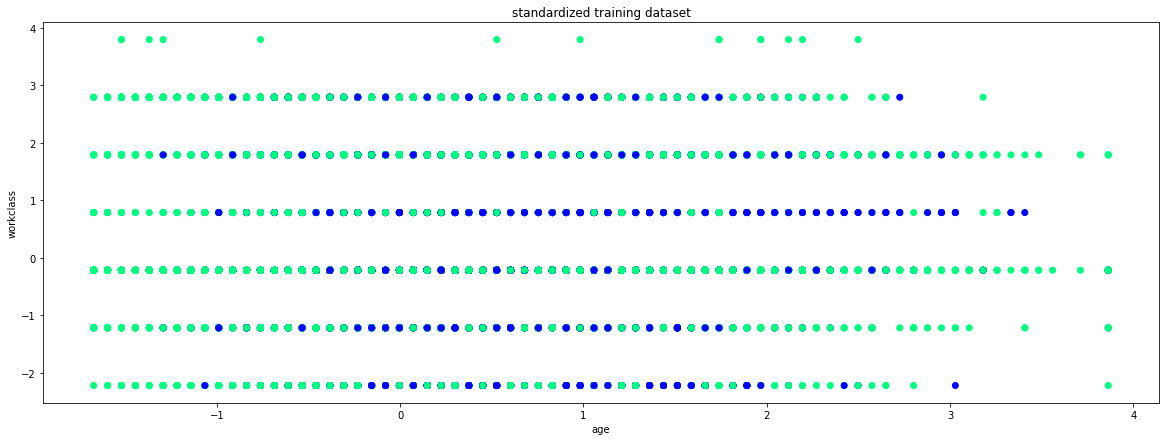

In [45]:
plt.figure(figsize=(20,7))
plt.scatter(x=train_sal[:,0], y=train_sal[:,1], c=y_sal_train, cmap=("winter_r"))
plt.title("standardized training dataset")
plt.xlabel("age")
plt.ylabel("workclass")

Text(0, 0.5, 'occupation')

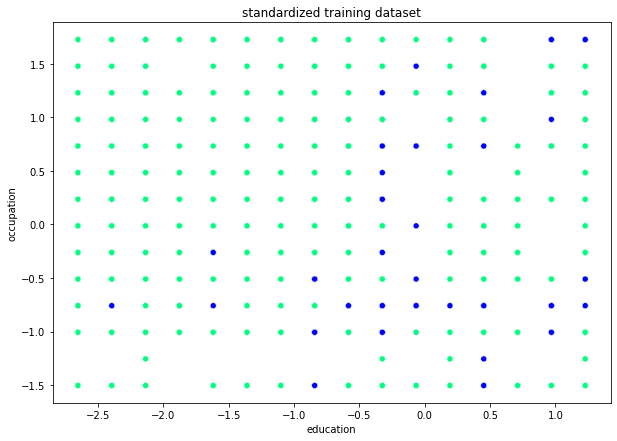

In [28]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=train_sal[:,2], y=train_sal[:,5], c=y_sal_train, cmap= "winter_r")
plt.title("standardized training dataset")
plt.xlabel("education")
plt.ylabel("occupation")

###  Analyzing the test dataset

In [29]:
salary_test = pd.read_csv("SalaryData_Test(1).csv")
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [30]:
salary_test1 = salary_test[salary_test.duplicated()]
salary_test1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [31]:
salary_test2 = salary_test.drop_duplicates().reset_index(drop=True)
salary_test2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
14126,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
14127,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
14128,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [32]:
salary_test2.workclass = salary_test2.workclass.astype('category').cat.codes
salary_test2.education = salary_test2.education.astype('category').cat.codes
salary_test2.maritalstatus = salary_test2.maritalstatus.astype('category').cat.codes
salary_test2.occupation = salary_test2.occupation.astype('category').cat.codes
salary_test2.relationship = salary_test2.relationship.astype('category').cat.codes
salary_test2.race = salary_test2.race.astype('category').cat.codes
salary_test2.sex = salary_test2.sex.astype('category').cat.codes
salary_test2.native = salary_test2.native.astype('category').cat.codes
salary_test2.Salary = salary_test2.Salary.astype('category').cat.codes

In [33]:
salary_test2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,33,2,9,13,4,9,3,4,1,0,0,40,37,0
14126,39,2,9,13,0,9,1,4,0,0,0,36,37,0
14127,38,2,9,13,2,9,0,4,1,0,0,50,37,0
14128,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [34]:
salary_test3 = salary_test2.values
salary_test3

array([[25,  2,  1, ..., 40, 37,  0],
       [38,  2, 11, ..., 50, 37,  0],
       [28,  1,  7, ..., 40, 37,  1],
       ...,
       [38,  2,  9, ..., 50, 37,  0],
       [44,  2,  9, ..., 40, 37,  0],
       [35,  3,  9, ..., 60, 37,  1]], dtype=int64)

In [35]:
x_sal_test = salary_test3[:,0:13]
x_sal_test

array([[25,  2,  1, ...,  0, 40, 37],
       [38,  2, 11, ...,  0, 50, 37],
       [28,  1,  7, ...,  0, 40, 37],
       ...,
       [38,  2,  9, ...,  0, 50, 37],
       [44,  2,  9, ...,  0, 40, 37],
       [35,  3,  9, ...,  0, 60, 37]], dtype=int64)

In [36]:
y_sal_test = salary_test3[:,13]
y_sal_test

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [37]:
test_sal = StandardScaler().fit_transform(x_sal_test)
test_sal

array([[-1.05408752, -0.22877429, -2.38547513, ..., -0.22610763,
        -0.08753833,  0.26950358],
       [-0.08603828, -0.22877429,  0.20086709, ..., -0.22610763,
         0.72761694,  0.26950358],
       [-0.83069154, -1.23706521, -0.8336698 , ..., -0.22610763,
        -0.08753833,  0.26950358],
       ...,
       [-0.08603828, -0.22877429, -0.31640136, ..., -0.22610763,
         0.72761694,  0.26950358],
       [ 0.36075367, -0.22877429, -0.31640136, ..., -0.22610763,
        -0.08753833,  0.26950358],
       [-0.30943426,  0.77951663, -0.31640136, ..., -0.22610763,
         1.54277221,  0.26950358]])

###   Visualizing the test dataset

Text(0, 0.5, 'workclass')

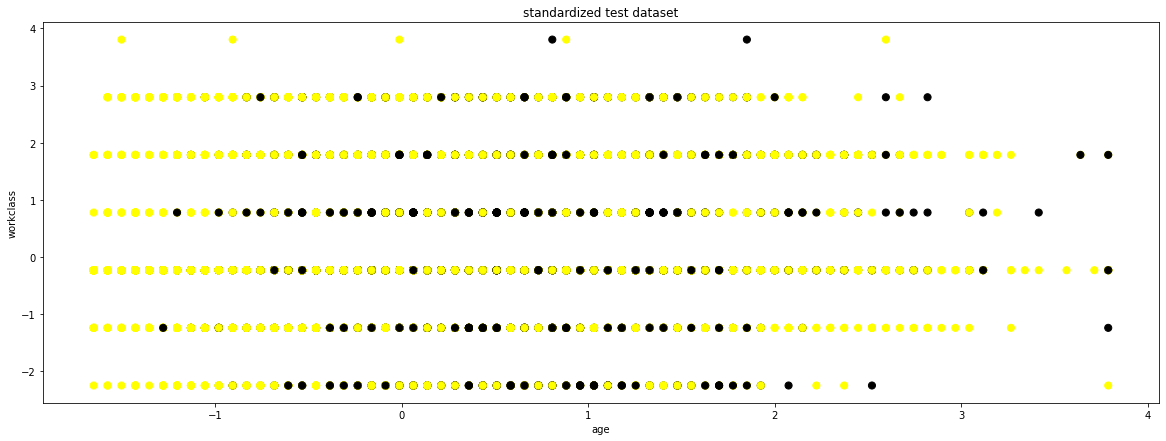

In [52]:
plt.figure(figsize=(20,7))
plt.scatter(x=test_sal[:,0], y=test_sal[:,1],s=50, c=y_sal_test, cmap="gnuplot_r")
plt.title("standardized test dataset")
plt.xlabel("age")
plt.ylabel("workclass")

Text(0, 0.5, 'occupation')

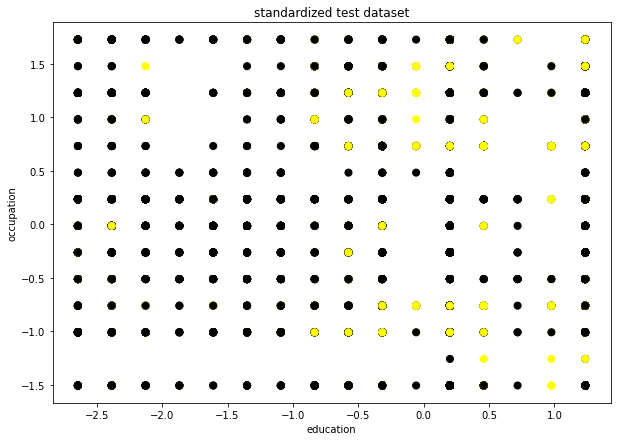

In [50]:
plt.figure(figsize=(10,7))
plt.scatter(x=test_sal[:,2], y=test_sal[:,5], s=50, c=y_sal_test, cmap="gnuplot")
plt.title("standardized test dataset")
plt.xlabel("education")
plt.ylabel("occupation")

###   Model using raidal bias function kernel

In [53]:
classifier_rbf = SVC(kernel= "rbf")
classifier_rbf.fit(train_sal , y_sal_train)
y_pred_rbf = classifier_rbf.predict(test_sal)

In [54]:
print(classification_report (y_sal_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     10620
           1       0.76      0.55      0.64      3510

    accuracy                           0.84     14130
   macro avg       0.81      0.75      0.77     14130
weighted avg       0.84      0.84      0.84     14130



In [55]:
confusion_matrix(y_sal_test, y_pred_rbf) 

array([[9995,  625],
       [1579, 1931]], dtype=int64)

In [56]:
support_vectors_rbf = classifier_rbf.support_vectors_
support_vectors_rbf

array([[-3.72591307e-03,  2.79138305e+00, -3.24518932e-01, ...,
        -2.31329961e-01, -9.43231647e-02,  2.82414361e-01],
       [-8.37780853e-01, -2.18298796e-01, -3.24518932e-01, ...,
        -2.31329961e-01, -9.43231647e-02, -4.97910510e+00],
       [-1.55372266e-01, -2.18298796e-01,  4.51758439e-01, ...,
        -2.31329961e-01, -9.43231647e-02,  2.82414361e-01],
       ...,
       [ 1.13362173e+00, -2.18298796e-01, -3.24518932e-01, ...,
        -2.31329961e-01,  7.15601861e-01, -2.10918540e+00],
       [-3.82841795e-01, -2.18298796e-01, -3.24518932e-01, ...,
        -2.31329961e-01,  1.12056437e+00,  2.82414361e-01],
       [-3.72591307e-03, -1.22152608e+00, -8.42037180e-01, ...,
        -2.31329961e-01, -1.71417322e+00,  2.82414361e-01]])

###   Visualizing the RBF kernel

Text(0, 0.5, 'workclass')

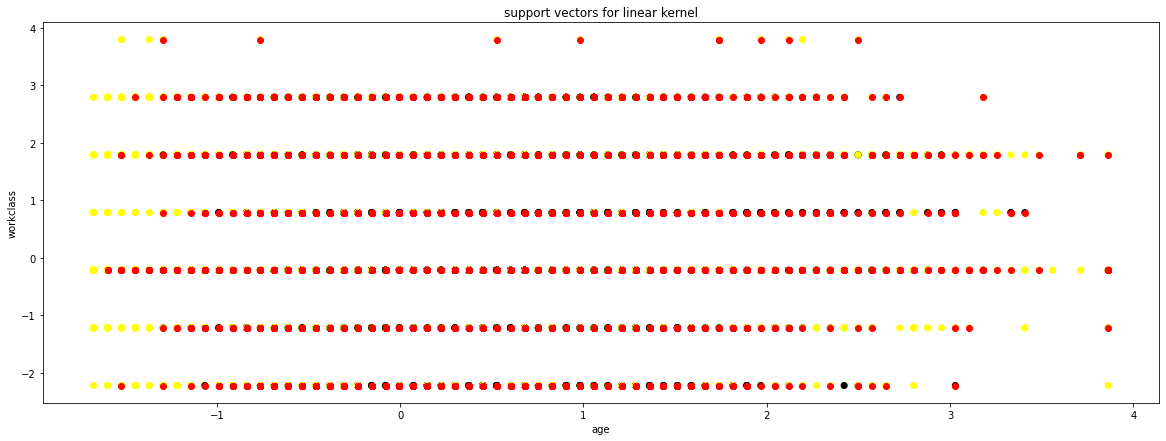

In [73]:
plt.figure(figsize=(20,7))
plt.scatter(train_sal[:, 0], train_sal[:, 1],c=y_sal_train, cmap="gnuplot_r")
plt.scatter(support_vectors_rbf[:,0], support_vectors_rbf[:,1], color='red')
plt.title('support vectors for linear kernel')
plt.xlabel('age')
plt.ylabel('workclass')

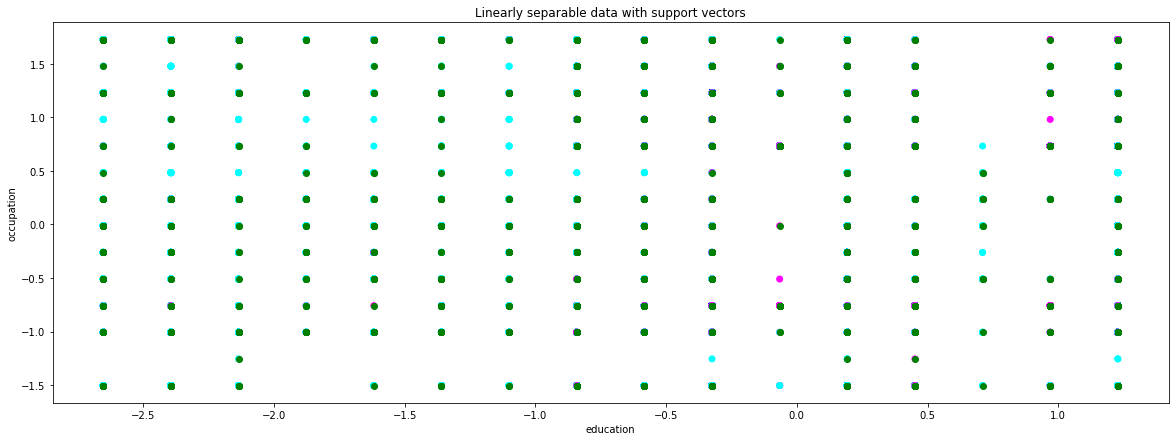

In [87]:
plt.figure(figsize=(20,7))
plt.scatter(train_sal[:,2], train_sal[:,5], c=y_sal_train, cmap= "cool")
plt.scatter(support_vectors_rbf[:,2], support_vectors_rbf[:,5], color='green')
plt.title('Linearly separable data with support vectors')
plt.xlabel('education')
plt.ylabel('occupation')
plt.show()

###  Model for Linear kernel

In [81]:
classifier_linear = SVC(kernel= "linear") 
classifier_linear.fit(train_sal , y_sal_train)
y_pred_linear = classifier_linear.predict(test_sal)

In [82]:
print(classification_report(y_sal_test, y_pred_linear))    

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     10620
           1       0.76      0.31      0.44      3510

    accuracy                           0.80     14130
   macro avg       0.79      0.64      0.66     14130
weighted avg       0.80      0.80      0.77     14130



In [83]:
confusion_matrix(y_sal_test, y_pred_linear)

array([[10278,   342],
       [ 2417,  1093]], dtype=int64)

In [84]:
support_vectors_linear = classifier_rbf.support_vectors_
support_vectors_linear

array([[-3.72591307e-03,  2.79138305e+00, -3.24518932e-01, ...,
        -2.31329961e-01, -9.43231647e-02,  2.82414361e-01],
       [-8.37780853e-01, -2.18298796e-01, -3.24518932e-01, ...,
        -2.31329961e-01, -9.43231647e-02, -4.97910510e+00],
       [-1.55372266e-01, -2.18298796e-01,  4.51758439e-01, ...,
        -2.31329961e-01, -9.43231647e-02,  2.82414361e-01],
       ...,
       [ 1.13362173e+00, -2.18298796e-01, -3.24518932e-01, ...,
        -2.31329961e-01,  7.15601861e-01, -2.10918540e+00],
       [-3.82841795e-01, -2.18298796e-01, -3.24518932e-01, ...,
        -2.31329961e-01,  1.12056437e+00,  2.82414361e-01],
       [-3.72591307e-03, -1.22152608e+00, -8.42037180e-01, ...,
        -2.31329961e-01, -1.71417322e+00,  2.82414361e-01]])

###   Visualizing the Linear kernel

Text(0, 0.5, 'workclass')

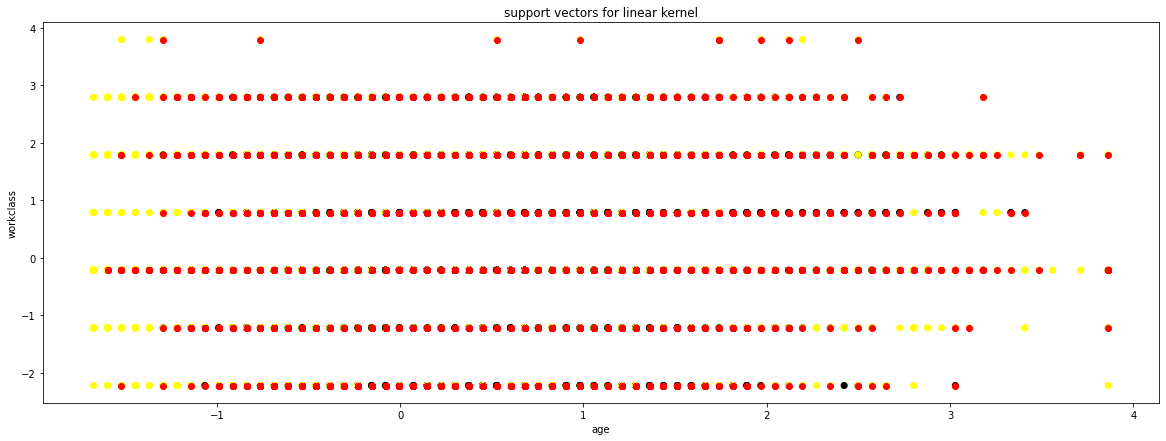

In [85]:
plt.figure(figsize=(20,7))
plt.scatter(train_sal[:, 0], train_sal[:, 1],c=y_sal_train, cmap="gnuplot_r")
plt.scatter(support_vectors_linear[:,0], support_vectors_linear[:,1], color='red')
plt.title('support vectors for linear kernel')
plt.xlabel('age')
plt.ylabel('workclass')

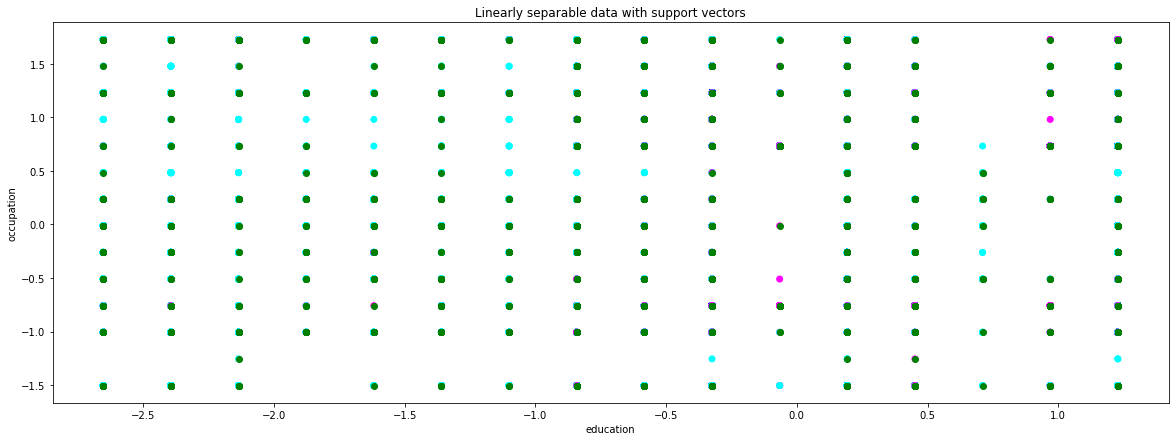

In [88]:
plt.figure(figsize=(20,7))
plt.scatter(train_sal[:,2], train_sal[:,5], c=y_sal_train, cmap= "cool")
plt.scatter(support_vectors_rbf[:,2], support_vectors_rbf[:,5], color='green')
plt.title('Linearly separable data with support vectors')
plt.xlabel('education')
plt.ylabel('occupation')
plt.show()

###  Model for Polynomial kernel 

In [89]:
classifier_poly = SVC(kernel= "poly") 
classifier_poly.fit(train_sal , y_sal_train)
y_pred_poly = classifier_poly.predict(test_sal)

In [91]:
print(classification_report(y_sal_test, y_pred_poly))    

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     10620
           1       0.77      0.50      0.60      3510

    accuracy                           0.84     14130
   macro avg       0.81      0.72      0.75     14130
weighted avg       0.83      0.84      0.82     14130



In [92]:
confusion_matrix(y_sal_test, y_pred_poly)

array([[10089,   531],
       [ 1770,  1740]], dtype=int64)

In [93]:
support_vectors_poly = classifier_rbf.support_vectors_
support_vectors_poly

array([[-3.72591307e-03,  2.79138305e+00, -3.24518932e-01, ...,
        -2.31329961e-01, -9.43231647e-02,  2.82414361e-01],
       [-8.37780853e-01, -2.18298796e-01, -3.24518932e-01, ...,
        -2.31329961e-01, -9.43231647e-02, -4.97910510e+00],
       [-1.55372266e-01, -2.18298796e-01,  4.51758439e-01, ...,
        -2.31329961e-01, -9.43231647e-02,  2.82414361e-01],
       ...,
       [ 1.13362173e+00, -2.18298796e-01, -3.24518932e-01, ...,
        -2.31329961e-01,  7.15601861e-01, -2.10918540e+00],
       [-3.82841795e-01, -2.18298796e-01, -3.24518932e-01, ...,
        -2.31329961e-01,  1.12056437e+00,  2.82414361e-01],
       [-3.72591307e-03, -1.22152608e+00, -8.42037180e-01, ...,
        -2.31329961e-01, -1.71417322e+00,  2.82414361e-01]])

###   Visualizing the Polynomial kernel

Text(0, 0.5, 'workclass')

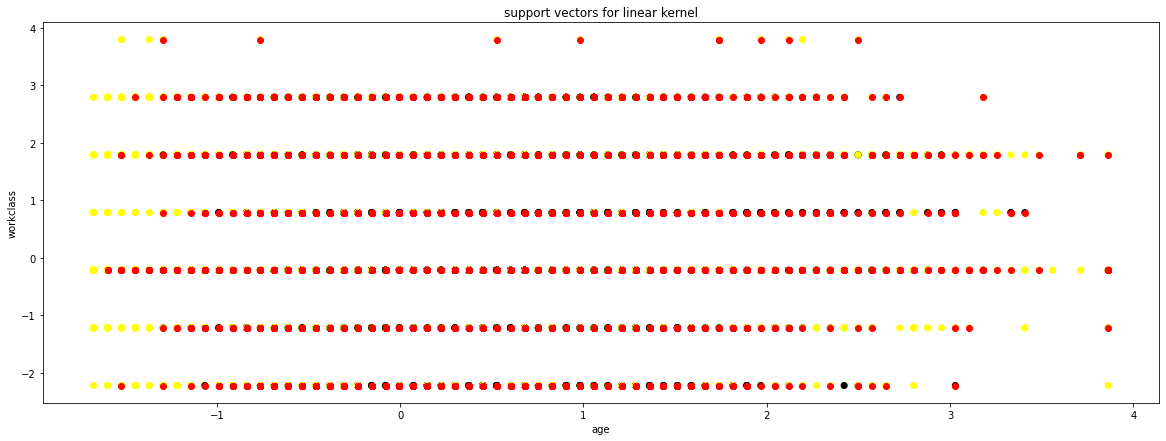

In [94]:
plt.figure(figsize=(20,7))
plt.scatter(train_sal[:, 0], train_sal[:, 1],c=y_sal_train, cmap="gnuplot_r")
plt.scatter(support_vectors_poly[:,0], support_vectors_poly[:,1], color='red')
plt.title('support vectors for linear kernel')
plt.xlabel('age')
plt.ylabel('workclass')

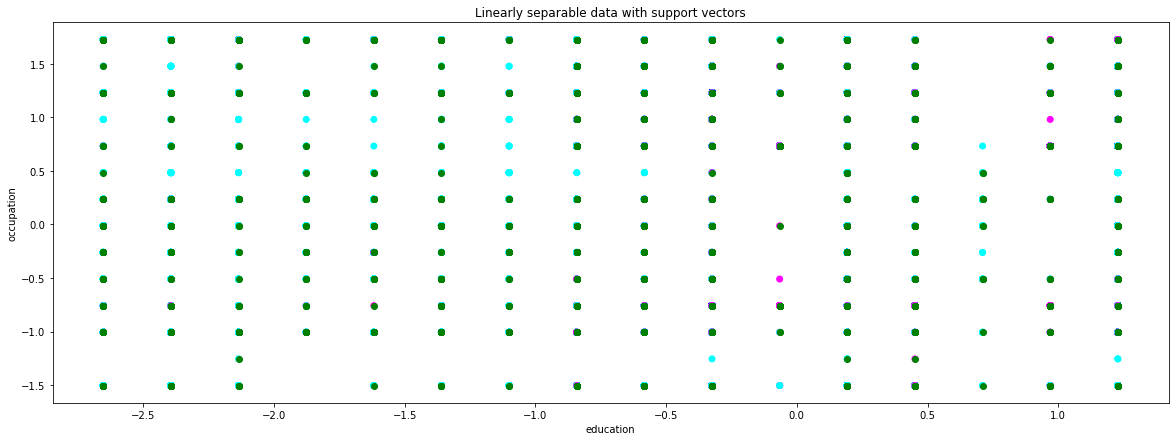

In [95]:
plt.figure(figsize=(20,7))
plt.scatter(train_sal[:,2], train_sal[:,5], c=y_sal_train, cmap= "cool")
plt.scatter(support_vectors_rbf[:,2], support_vectors_rbf[:,5], color='green')
plt.title('Linearly separable data with support vectors')
plt.xlabel('education')
plt.ylabel('occupation')
plt.show()

###   Both RBF and Polynomial classifiers are best for support vector machines 